In [3]:
import os

#for data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
os.chdir('D:\Imarticus\ML')

In [5]:
os.listdir()

['4kvideodownloader_4.20.1_x64_online.exe',
 'ambardarviresh18@gmail.com_LinearRegg.ipynb',
 'ambardarviresh18@gmail.com_LogiRegg.ipynb',
 'archive.zip',
 'aw_fb_data.csv',
 'cars_modified.csv',
 'car_done.csv',
 'Car_sales.csv',
 'Chi-Sq Test.ipynb',
 'Churn_Modelling.csv',
 'cr.csv',
 'data_for_weka_aw.csv',
 'data_for_weka_fb.csv',
 'dfeval.csv',
 'dftrain.csv',
 'Fish_dataset.csv',
 'fitbit.csv',
 'linerRegg (1).ipynb',
 'linerRegg.ipynb',
 'LoansData.csv',
 'Loan_data (1).ipynb',
 'loan_modified.csv',
 'New Season.jpg',
 'PGA20_ML_Notes.xlsx',
 'prde_train1.xlsx',
 'supermarket_sales - Sheet1.csv',
 'Supunky gamer 0518.png',
 'temp20220318-39649-1q8i4xq.png',
 'temp20220318-39649-1q8i4xq.v3.jpg',
 'Test_RiskScore.xlsx',
 'tkf.mp4',
 'trainprofile.xlsx',
 'train_profile.xlsx',
 'Train_RiskScore.csv',
 'Tree based',
 'vehicles.csv',
 'Viresh-sgd.ipynb',
 'xAPI-Edu-Data.csv']

In [6]:
# importig data
df = pd.read_csv('LoansData.csv')

In [7]:
df.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,1,20000.0,20000.0,0.09,36,debt_consolidation,0.15,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0
1,2,19200.0,19200.0,0.12,36,debt_consolidation,0.28,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0
2,3,35000.0,35000.0,0.22,60,debt_consolidation,0.24,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0
3,4,10000.0,9975.0,0.10,36,debt_consolidation,0.14,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0
4,5,12000.0,12000.0,0.12,36,credit_card,0.19,RENT,3195.00,695.0,11.0,14469.0,0.0


In [8]:
df.shape

(2500, 13)

In [9]:
df.dtypes

LoanID                              int64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                         int64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
CIBIL_Score                       float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
dtype: object

In [10]:
df.dtypes.value_counts()

float64    9
int64      2
object     2
dtype: int64

In [11]:
df.dtypes[df.dtypes=='object']

Loan.Purpose      object
Home.Ownership    object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   float64
 4   Loan.Length                     2500 non-null   int64  
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   float64
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   CIBIL_Score                     2498 non-null   float64
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

## Univarient Analysis

In [13]:
df['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [14]:
df['Loan.Purpose'].value_counts(normalize=True,dropna=False)

debt_consolidation    0.5228
credit_card           0.1776
other                 0.0804
home_improvement      0.0608
major_purchase        0.0404
small_business        0.0348
car                   0.0200
wedding               0.0156
medical               0.0120
moving                0.0116
vacation              0.0084
house                 0.0080
educational           0.0060
renewable_energy      0.0016
Name: Loan.Purpose, dtype: float64

In [15]:
df['Loan.Purpose'].nunique()

14

In [16]:
df['Home.Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [17]:
df['Home.Ownership'].value_counts(normalize=True,dropna=False)

MORTGAGE    0.4588
RENT        0.4584
OWN         0.0800
OTHER       0.0020
NONE        0.0004
NaN         0.0004
Name: Home.Ownership, dtype: float64

In [18]:
outliers= df.describe(percentiles=[.01,.02,.03,.05,.1,0.15,.25,0.75,0.85,.90,.95,.96,.98,.99]).T

outliers

,count,mean,std,min,1%,2%,3%,5%,10%,15%,25%,50%,75%,85%,90%,95%,96%,98%,99%,max
LoanID,2500.0,1250.500000,721.832160,1.00,25.9900,50.98,75.97,125.950,250.90,375.85,625.75,1250.50,1875.25,2125.15,2250.10,2375.050,2400.04,2450.02,2475.01,2500.00
Amount.Requested,2499.0,12405.462185,7802.933666,1000.00,1500.0000,1900.00,2000.00,2867.500,4000.00,5000.00,6000.00,10000.00,17000.00,20037.50,24000.00,28000.000,30000.00,35000.00,35000.00,35000.00
Amount.Funded.By.Investors,2499.0,12002.374186,7746.767348,-0.01,998.3456,1400.00,1800.00,2200.000,3600.00,4700.00,6000.00,10000.00,16000.00,20000.00,23950.00,27925.000,29950.00,33018.00,35000.00,35000.00
Interest.Rate,2498.0,0.130380,0.041289,0.05,0.0600,0.06,0.06,0.070,0.08,0.08,0.10,0.13,0.16,0.18,0.19,0.200,0.21,0.22,0.23,0.25
Loan.Length,2500.0,41.260800,9.930893,36.00,36.0000,36.00,36.00,36.000,36.00,36.00,36.00,36.00,36.00,60.00,60.00,60.000,60.00,60.00,60.00,60.00
Debt.To.Income.Ratio,2499.0,0.153854,0.075103,0.00,0.0100,0.02,0.02,0.030,0.05,0.07,0.10,0.15,0.21,0.23,0.25,0.280,0.29,0.31,0.33,0.35
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,1416.4032,1666.67,1833.33,2166.003,2600.00,2916.67,3500.00,5000.00,6800.00,8333.33,9297.33,11666.703,12500.00,15000.00,18750.00,102750.00
CIBIL_Score,2498.0,705.904724,35.042199,640.00,660.0000,660.00,660.00,660.000,665.00,670.00,680.00,700.00,725.00,745.00,755.00,775.000,780.00,795.00,805.00,830.00
Open.CREDIT.Lines,2497.0,10.072887,4.507416,2.00,3.0000,3.00,3.00,4.000,5.00,6.00,7.00,9.00,13.00,15.00,16.00,18.000,19.00,21.00,23.00,38.00
Revolving.CREDIT.Balance,2497.0,15223.184622,18281.015258,0.00,0.0000,65.24,348.64,916.200,2298.80,3528.80,5584.00,10948.00,18861.00,25429.60,30047.00,40768.400,43744.40,63322.16,92433.64,270800.00


In [19]:
# checking for null values
df.isna().sum().sort_values()

LoanID                            0
Loan.Length                       0
Loan.Purpose                      0
Amount.Requested                  1
Amount.Funded.By.Investors        1
Debt.To.Income.Ratio              1
Home.Ownership                    1
Monthly.Income                    1
Interest.Rate                     2
CIBIL_Score                       2
Open.CREDIT.Lines                 3
Revolving.CREDIT.Balance          3
Inquiries.in.the.Last.6.Months    3
dtype: int64

In [20]:
# as no of na vlues are insignificant so we can drop them
df.dropna(inplace=True)

In [21]:
df.shape

(2489, 13)

## Bivariate Analysis

##### Numerical to Numerical
Y (target variable/ dependent variable) = interest rate

In [22]:
df.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,1,20000.0,20000.0,0.09,36,debt_consolidation,0.15,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0
1,2,19200.0,19200.0,0.12,36,debt_consolidation,0.28,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0
2,3,35000.0,35000.0,0.22,60,debt_consolidation,0.24,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0
3,4,10000.0,9975.0,0.10,36,debt_consolidation,0.14,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0
4,5,12000.0,12000.0,0.12,36,credit_card,0.19,RENT,3195.00,695.0,11.0,14469.0,0.0


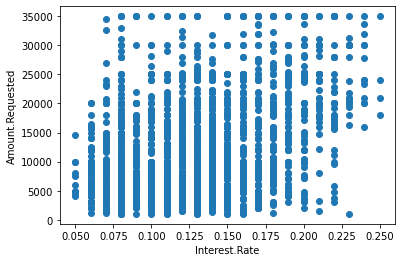

In [23]:
plt.scatter(df['Interest.Rate'],df['Amount.Requested'])
plt.xlabel('Interest.Rate')
plt.ylabel('Amount.Requested')
plt.show()

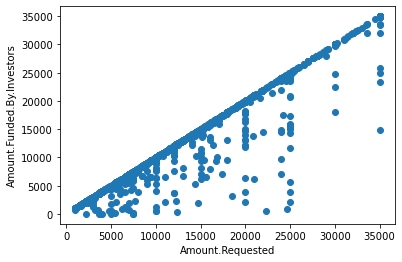

In [24]:
plt.scatter(df['Amount.Requested'],df['Amount.Funded.By.Investors'])
plt.xlabel('Amount.Requested')
plt.ylabel('Amount.Funded.By.Investors')
plt.show()

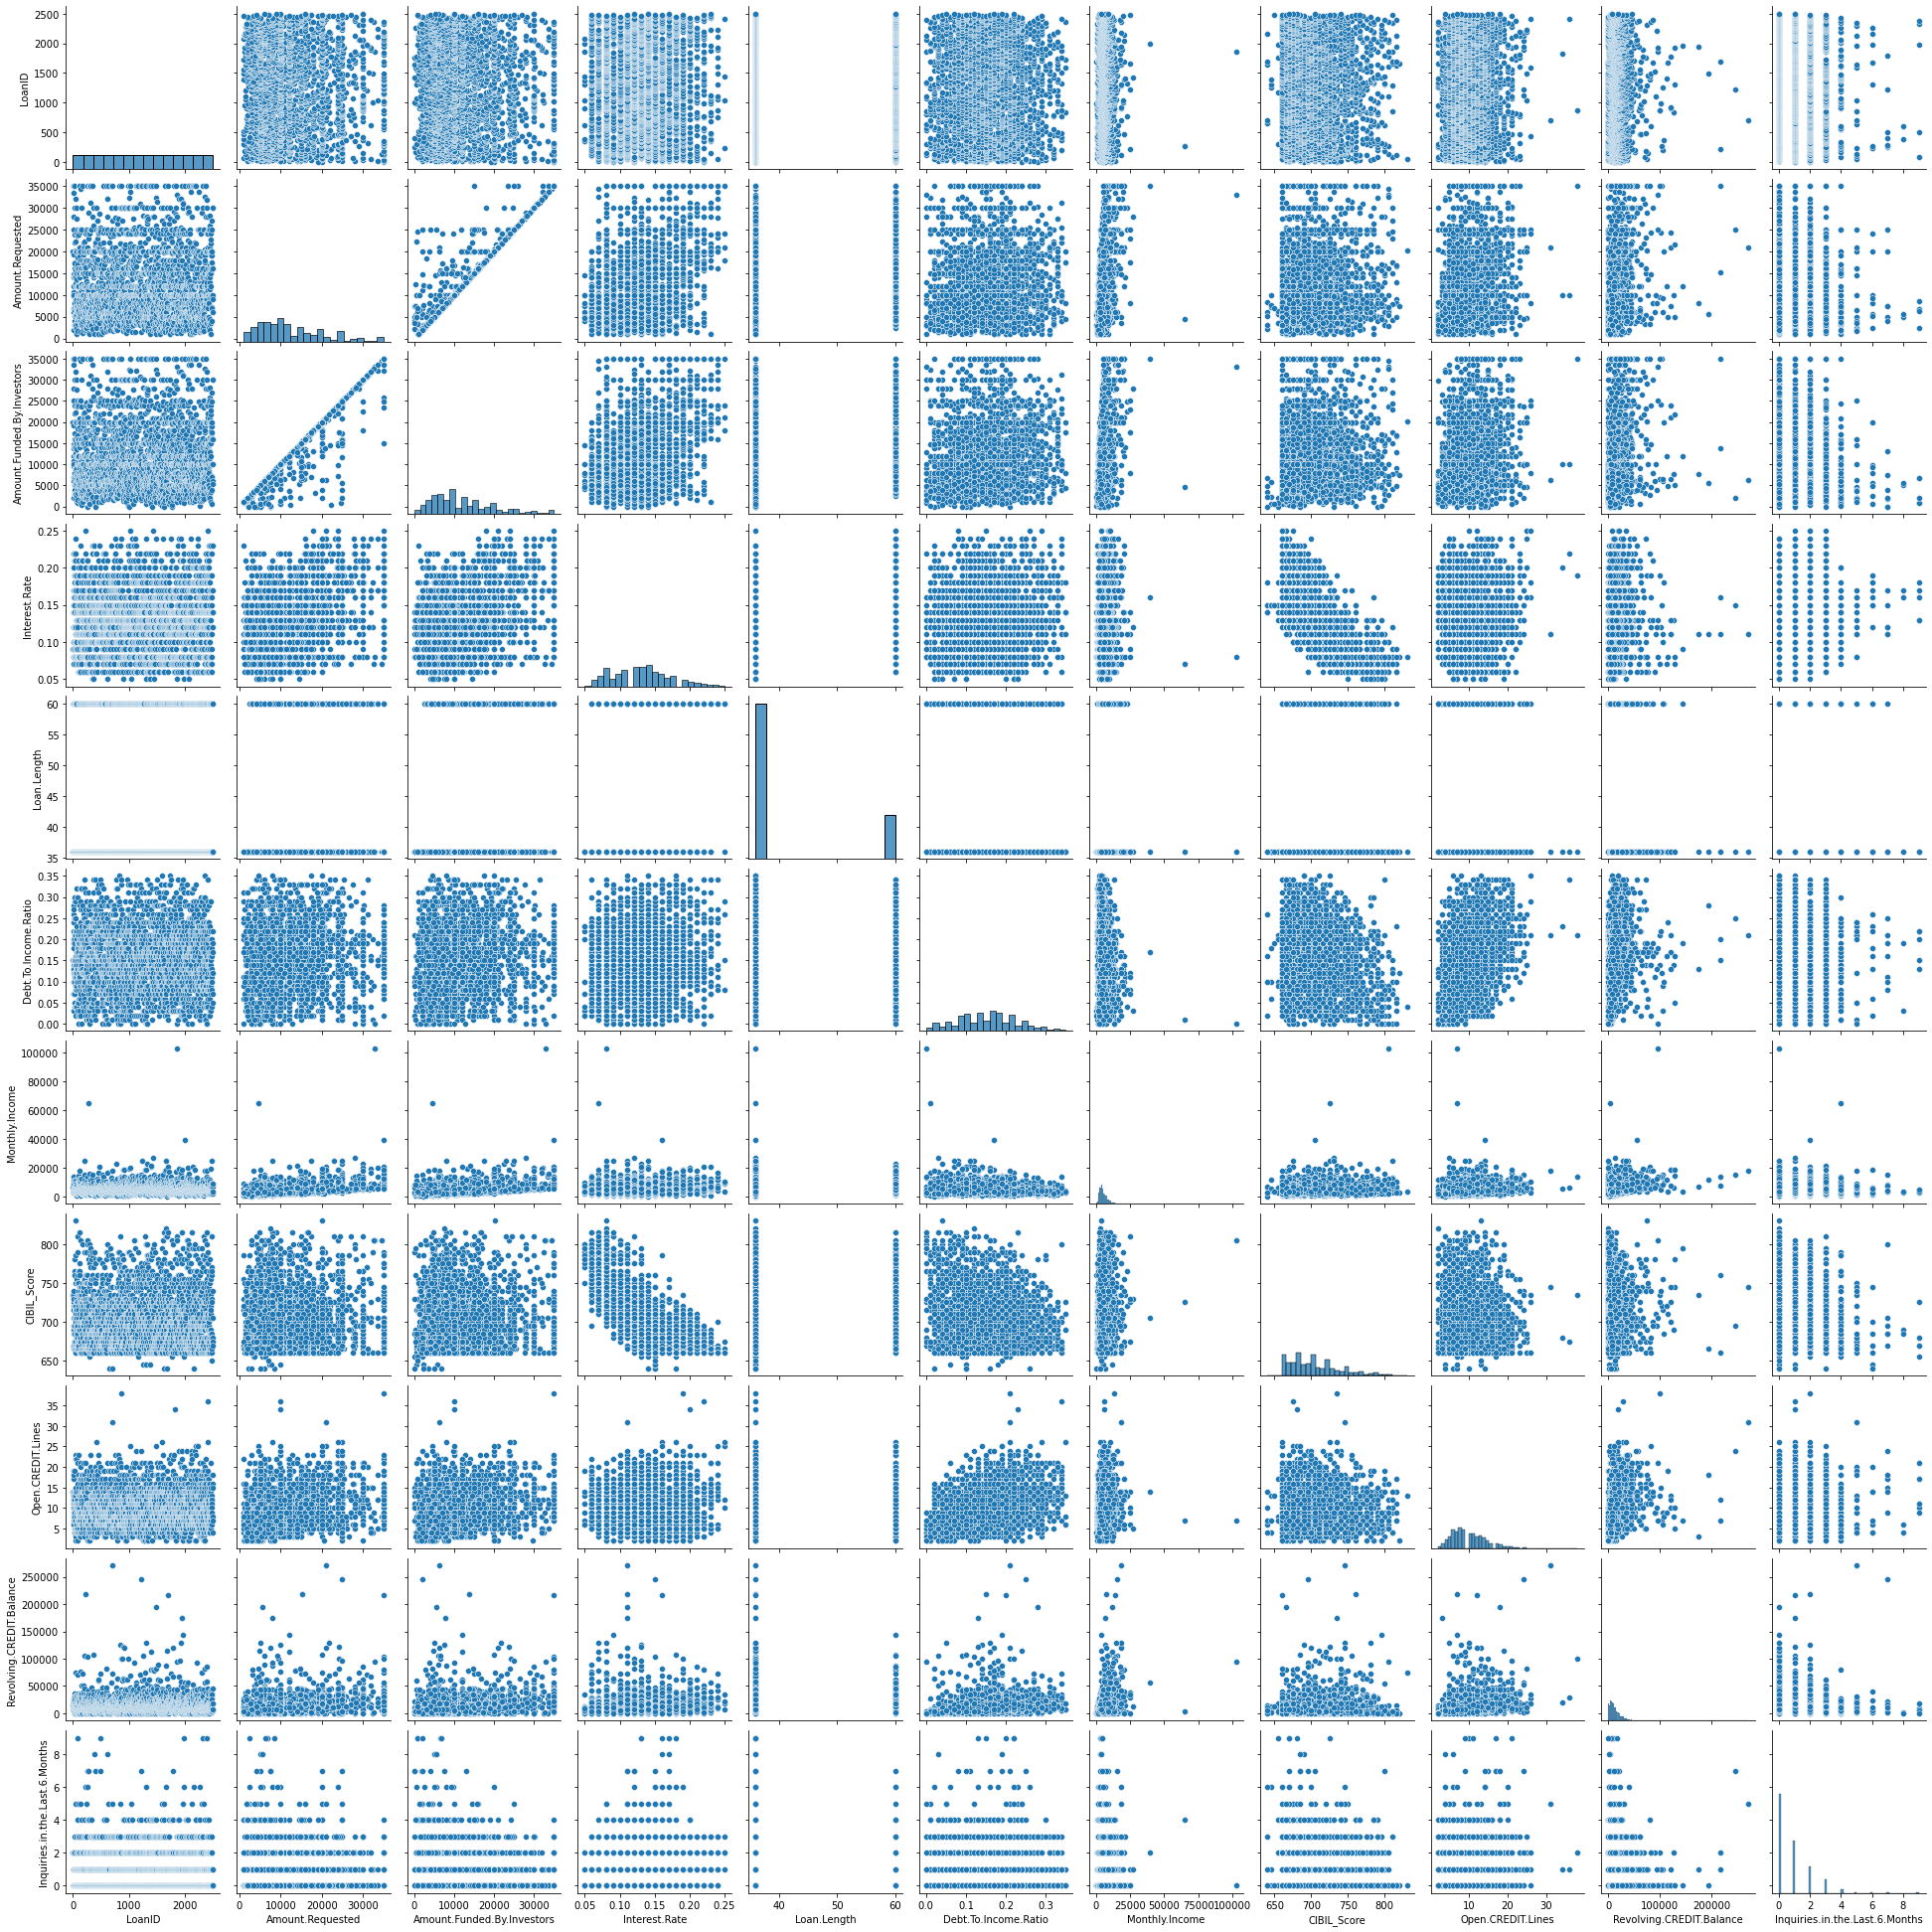

In [25]:
sns.pairplot(df)

### categorical - Numerical variables : bar graph, pie graph, hypothesis testing(T test, Z test)

<AxesSubplot:xlabel='Loan.Purpose'>

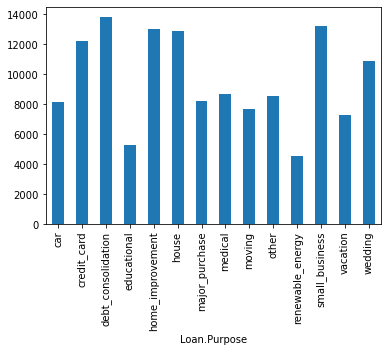

In [26]:
df.groupby(['Loan.Purpose'])['Amount.Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Loan.Purpose'>

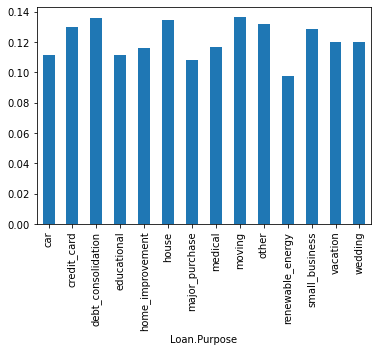

In [27]:
df.groupby(['Loan.Purpose'])['Interest.Rate'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Loan.Purpose'>

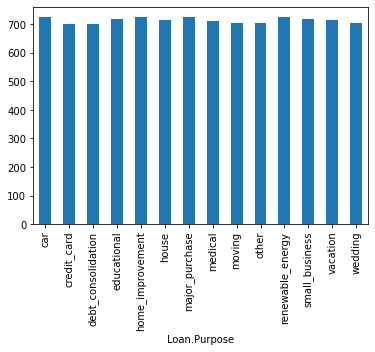

In [28]:
df.groupby(['Loan.Purpose'])['CIBIL_Score'].mean().plot(kind='bar')

In [29]:
df.groupby(['Loan.Purpose']).agg({'Interest.Rate':['min','max','mean'],
                                  'Amount.Requested':['min','max','mean','std'],
                                 'CIBIL_Score':['min','max','mean','count']})

Interest.Rate                 Amount.Requested           \
                             min   max      mean              min      max   
Loan.Purpose                                                                 
car                         0.06  0.20  0.111200           1700.0  23000.0   
credit_card                 0.05  0.25  0.130000           1125.0  35000.0   
debt_consolidation          0.06  0.25  0.135557           1000.0  35000.0   
educational                 0.07  0.19  0.111333           1000.0  12000.0   
home_improvement            0.05  0.23  0.115789           1000.0  35000.0   
house                       0.06  0.22  0.134500           3000.0  35000.0   
major_purchase              0.05  0.19  0.108119           1500.0  35000.0   
medical                     0.05  0.23  0.116667           1400.0  35000.0   
moving                      0.06  0.25  0.136552           1000.0  32000.0   
other                       0.06  0.23  0.131910           1000.0  35000.0   
renewable_energy            0.07  0.14  0.097500           1000.0   8400.0   
small_business              0.06  0.22  0.128721           1800.0  35000.0   
vacation                    0.05  0.18  0.120000           1400.0  17000.0   
wedding                     0.05  0.22  0.120000           2000.0  30000.0   

                                              CIBIL_Score                     \
                            mean          std         min    max        mean   
Loan.Purpose                                                                   
car                  8167.500000  5023.603090       660.0  815.0  725.300000   
credit_card         12245.316027  6813.700126       640.0  810.0  699.593679   
debt_consolidation  13830.591852  7886.357619       640.0  815.0  702.109915   
educational          5305.000000  3290.519390       640.0  805.0  720.333333   
home_improvement    13029.605263  8770.616403       660.0  830.0  725.921053   
house               12888.750000  8464.812908       660.0  810.0  715.750000   
major_purchase       8187.128713  6729.902130       650.0  820.0  725.693069   
medical              8710.000000  6764.657139       655.0  810.0  713.000000   
moving               7672.413793  7079.189651       660.0  785.0  703.103448   
other                8583.417085  6807.854023       645.0  805.0  705.201005   
renewable_energy     4525.000000  3041.244263       665.0  760.0  725.000000   
small_business      13238.372093  8460.257173       660.0  810.0  718.313953   
vacation             7314.285714  4225.078190       660.0  815.0  715.238095   
wedding             10915.789474  7196.818979       660.0  765.0  705.000000   

                          
                   count  
Loan.Purpose              
car                   50  
credit_card          443  
debt_consolidation  1301  
educational           15  
home_improvement     152  
house                 20  
major_purchase       101  
medical               30  
moving                29  
other                199  
renewable_energy       4  
small_business        86  
vacation              21  
wedding               38

In [30]:
df.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'Home.Ownership', 'Monthly.Income', 'CIBIL_Score', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months'],
      dtype='object')

In [31]:
df.groupby(['Home.Ownership']).agg({'Interest.Rate':['min','max','mean'],
                                  'Amount.Requested':['min','max','mean','std'],
                                 'CIBIL_Score':['min','max','mean','count']})

Interest.Rate                 Amount.Requested           \
                         min   max      mean              min      max   
Home.Ownership                                                           
MORTGAGE                0.05  0.25  0.127168           1000.0  35000.0   
OTHER                   0.14  0.22  0.160000           3500.0  20000.0   
OWN                     0.05  0.23  0.128800           1000.0  35000.0   
RENT                    0.05  0.25  0.133860           1000.0  35000.0   

                                          CIBIL_Score                           
                        mean          std         min    max        mean count  
Home.Ownership                                                                  
MORTGAGE        13733.085664  8150.161636       645.0  830.0  711.708916  1144  
OTHER            9625.000000  6537.966045       655.0  680.0  672.000000     5  
OWN             11412.375000  7975.436535       640.0  820.0  706.550000   200  
RENT            11269.342105  7206.679771       640.0  810.0  700.105263  1140

<AxesSubplot:xlabel='Loan.Purpose'>

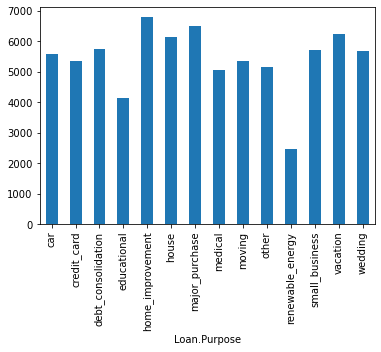

In [32]:
df.groupby(['Loan.Purpose'])['Monthly.Income'].mean().plot(kind='bar')

### As intrest rate is our Target variable so watching his density curve

<AxesSubplot:ylabel='Density'>

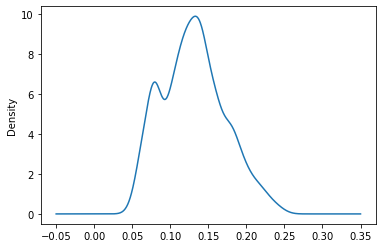

In [33]:
df['Interest.Rate'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

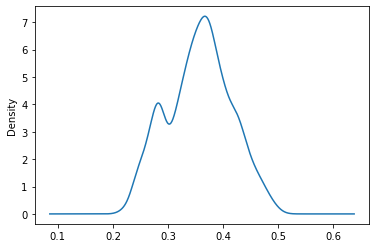

In [34]:
np.sqrt(df['Interest.Rate']).plot(kind='density')

<AxesSubplot:ylabel='Density'>

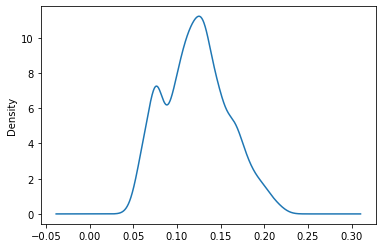

In [35]:
np.log1p(df['Interest.Rate']).plot(kind='density')

C:\Users\ambar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest.Rate', ylabel='Density'>

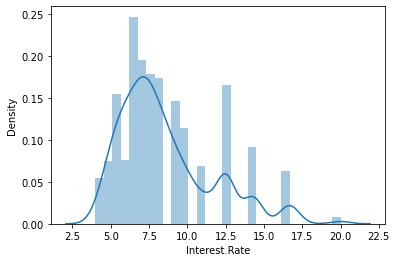

In [36]:
recip = 1/df['Interest.Rate']
sns.distplot(recip)

## Outliers Treatment 

In [37]:
# outliers capping method - 1 (percentile method)
def outlier_capping(x):
    x= x.clip(upper= x.quantile(.99))
    x= x.clip(lower= x.quantile(.01))
    return x

In [38]:
df1=df.copy()
df1.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,1,20000.0,20000.0,0.09,36,debt_consolidation,0.15,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0
1,2,19200.0,19200.0,0.12,36,debt_consolidation,0.28,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0
2,3,35000.0,35000.0,0.22,60,debt_consolidation,0.24,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0
3,4,10000.0,9975.0,0.10,36,debt_consolidation,0.14,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0
4,5,12000.0,12000.0,0.12,36,credit_card,0.19,RENT,3195.00,695.0,11.0,14469.0,0.0


In [39]:
df_num= df1.drop(columns=['Loan.Purpose','Home.Ownership'])

df_cate= df1[['Loan.Purpose','Home.Ownership']]

In [40]:
df_num1= df_num.apply(outlier_capping)

In [41]:
df_cleaned= pd.concat([df_num1, df_cate],axis=1)
df_cleaned.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Purpose,Home.Ownership
0,25.88,20000.0,20000.0,0.09,36,0.15,6541.67,735.0,14.0,14272.0,2.0,debt_consolidation,MORTGAGE
1,25.88,19200.0,19200.0,0.12,36,0.28,4583.33,715.0,12.0,11140.0,1.0,debt_consolidation,MORTGAGE
2,25.88,35000.0,35000.0,0.22,60,0.24,11500.00,690.0,14.0,21977.0,1.0,debt_consolidation,MORTGAGE
3,25.88,10000.0,9975.0,0.10,36,0.14,3833.33,695.0,10.0,9346.0,0.0,debt_consolidation,MORTGAGE
4,25.88,12000.0,12000.0,0.12,36,0.19,3195.00,695.0,11.0,14469.0,0.0,credit_card,RENT


### Converting Categorical variables to Numerical

In [42]:
df_cleaned_dummy= pd.get_dummies(df_cleaned,drop_first=True)

In [43]:
df_cleaned_dummy.drop(['LoanID'],axis=1,inplace=True)

In [44]:
df_cleaned_dummy.shape

(2489, 26)

In [45]:
df_cleaned_dummy.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT'],
      dtype='object')

In [46]:
corr1= df_cleaned_dummy[['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months']].corr()

<AxesSubplot:>

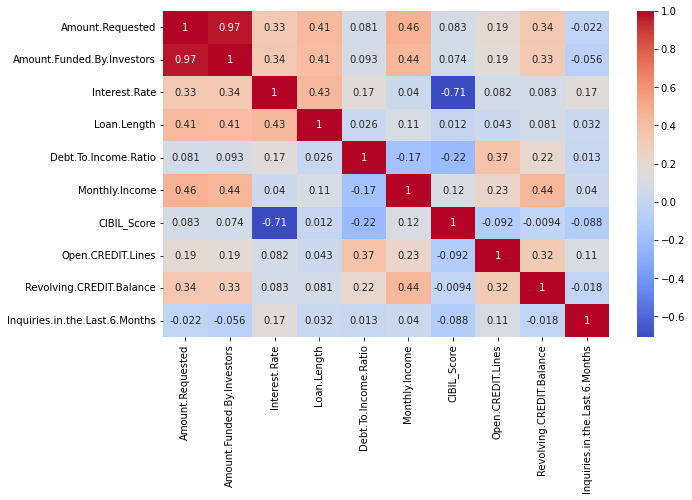

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(corr1,cmap='coolwarm',annot=True)

In [48]:
df_cleaned_dummy.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,...,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT
0,20000.0,20000.0,0.09,36,0.15,6541.67,735.0,14.0,14272.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,19200.0,0.12,36,0.28,4583.33,715.0,12.0,11140.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,35000.0,0.22,60,0.24,11500.00,690.0,14.0,21977.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9975.0,0.10,36,0.14,3833.33,695.0,10.0,9346.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,12000.0,0.12,36,0.19,3195.00,695.0,11.0,14469.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
x= df_cleaned_dummy.drop(columns=['Interest.Rate'])
y= df_cleaned_dummy['Interest.Rate']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.3,random_state=8)


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   # x-min/(max-min)

scaler.fit(x_train)

x_train_std = scaler.transform(x_train)  #6000 - 0.567
x_test_std= scaler.transform(x_test) 

x_test_std

array([[-0.63572421, -0.59242745,  1.96274494, ..., -0.03390318,
         3.43639688, -0.92048675],
       [-1.31815511, -1.27474085, -0.50949055, ..., -0.03390318,
        -0.29100248,  1.08638174],
       [ 2.91099415,  2.97362563, -0.50949055, ..., -0.03390318,
        -0.29100248, -0.92048675],
       ...,
       [-0.933687  , -0.88852572, -0.50949055, ..., -0.03390318,
        -0.29100248, -0.92048675],
       [-1.18999907, -1.14600247, -0.50949055, ..., -0.03390318,
         3.43639688, -0.92048675],
       [-1.31815511, -1.27474085, -0.50949055, ..., -0.03390318,
        -0.29100248, -0.92048675]])

In [52]:
from sklearn.linear_model import SGDRegressor

In [53]:
sgd= SGDRegressor(max_iter= 10000, epsilon= 0.000001, loss="squared_loss")

# max_iter= no. of iteration, 
# epsilon= learning rate,
# OLS - loss/cost function/MSE

In [54]:
sgd.fit(x_train_std, y_train)

SGDRegressor(epsilon=1e-06, max_iter=10000)

In [55]:
# pred y = w1x1+ wx2 +..... c

In [56]:
sgd.score(x_train_std, y_train)  # r^2 - coefficient of determination

0.7670480847377958

In [57]:
sgd.score(x_test_std, y_test)  # r^2 - coefficient of determination

0.7606132145180275

In [58]:
sgd.coef_   # m value or slope

array([ 5.56222917e-03,  7.12857150e-03,  1.25781024e-02, -3.97951547e-04,
       -1.50528458e-03, -3.07069694e-02, -1.98154297e-03, -7.38784977e-04,
        4.70738542e-03, -8.03993443e-04,  2.93984663e-04,  4.57028669e-04,
        4.77400513e-04,  6.47426619e-04,  2.58894482e-04,  1.28897477e-04,
        1.50665313e-03,  2.12166062e-03, -1.39346574e-04,  1.09751125e-03,
        1.23232233e-03, -1.97472824e-04,  9.20681119e-05,  8.95569552e-04,
        5.14207644e-04])

In [59]:
sgd.intercept_ # constant value or c

array([0.12974731])

In [60]:
def evaluate_reg(x,y,model):
    x1= x.copy()
    y1= y.copy()
    predY= model.predict(x1)
    mse= np.mean((predY- y1)**2)
    rmse= np.sqrt(np.mean((predY- y1)**2))
    print(f"MSE {mse}, RMSE {rmse}")

In [61]:
evaluate_reg(x_train_std,y_train,sgd)

MSE 0.00039732407953667386, RMSE 0.01993298972900638


In [62]:
evaluate_reg(x_test_std,y_test,sgd)

MSE 0.000386361294479234, RMSE 0.019656075256246706


### Using VIF (Variance Inflation Factor)

In [63]:
df_cleaned_dummy.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT'],
      dtype='object')

In [64]:
x= df_cleaned_dummy[['Amount.Requested',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months']]

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
x.columns

Index(['Amount.Requested', 'Debt.To.Income.Ratio', 'Monthly.Income',
       'CIBIL_Score', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months'],
      dtype='object')

In [69]:
x.values

array([[2.00000e+04, 1.50000e-01, 6.54167e+03, ..., 1.40000e+01,
        1.42720e+04, 2.00000e+00],
       [1.92000e+04, 2.80000e-01, 4.58333e+03, ..., 1.20000e+01,
        1.11400e+04, 1.00000e+00],
       [3.50000e+04, 2.40000e-01, 1.15000e+04, ..., 1.40000e+01,
        2.19770e+04, 1.00000e+00],
       ...,
       [1.00000e+04, 5.00000e-02, 2.16667e+03, ..., 4.00000e+00,
        4.54400e+03, 0.00000e+00],
       [6.00000e+03, 1.70000e-01, 3.50000e+03, ..., 8.00000e+00,
        7.75300e+03, 0.00000e+00],
       [9.00000e+03, 7.00000e-02, 3.87500e+03, ..., 7.00000e+00,
        7.58900e+03, 0.00000e+00]])

In [67]:
vif_data= pd.DataFrame()
vif_data['Var']= x.columns

vif_data['VIF']=[variance_inflation_factor(x.values, i ) for i in range(len(x.columns))]

In [68]:
vif_data.sort_values(by=['VIF'],ascending=False)

,Var,VIF
3,CIBIL_Score,11.490182
4,Open.CREDIT.Lines,8.257283
2,Monthly.Income,7.221889
1,Debt.To.Income.Ratio,6.895955
0,Amount.Requested,4.745989
5,Revolving.CREDIT.Balance,2.862193
6,Inquiries.in.the.Last.6.Months,1.624710
